# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f"Shape: {data.shape}")
print(f"NaN values {np.bool(True) in data.isna().values}")
print(f"NaN values {np.bool(True) in data.duplicated().values}")
data.head()

Shape: (4324, 9)
NaN values True
NaN values False


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [7]:
data.dropna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


## Descriptive Statistics

In [8]:
data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [9]:
data['Organisation'].value_counts()

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [10]:
data['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [11]:
data['Mission_Status'].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

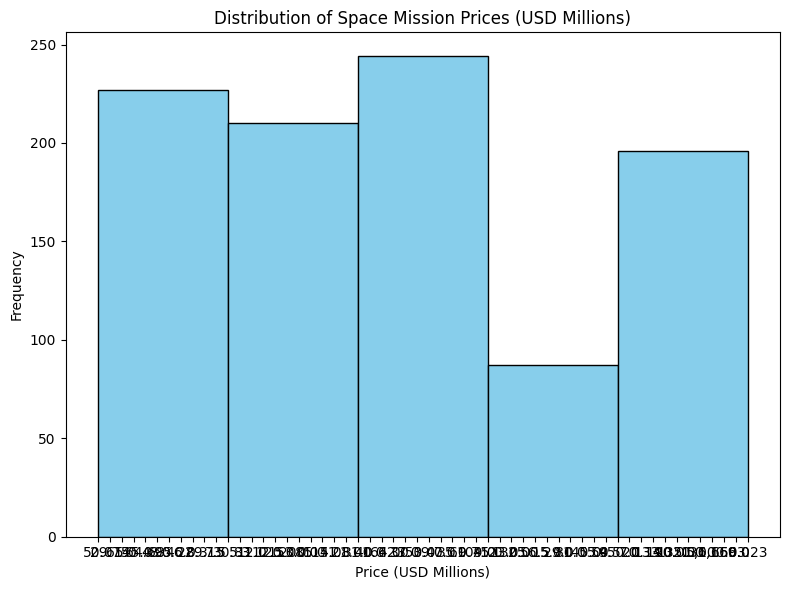

In [12]:
df_cleaned = data.dropna(subset=['Price'])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Space Mission Prices (USD Millions)')
plt.xlabel('Price (USD Millions)')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


In [13]:
data['country'] = data['Location'].str.split(',').str[-1].str.strip()
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


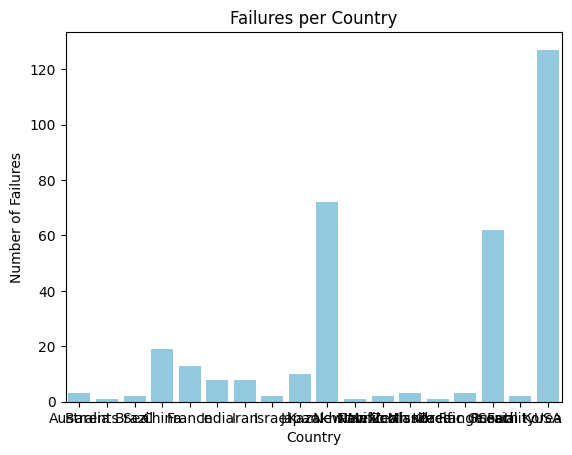

In [14]:
failure_data = data[data['Mission_Status'] == 'Failure']
failure_data = failure_data.groupby('country').size()

import seaborn as sns

# Crear un gráfico de barras usando seaborn
sns.barplot(x=failure_data.index, y=failure_data.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Country')
plt.ylabel('Number of Failures')
plt.title('Failures per Country')

# Mostrar el gráfico
plt.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

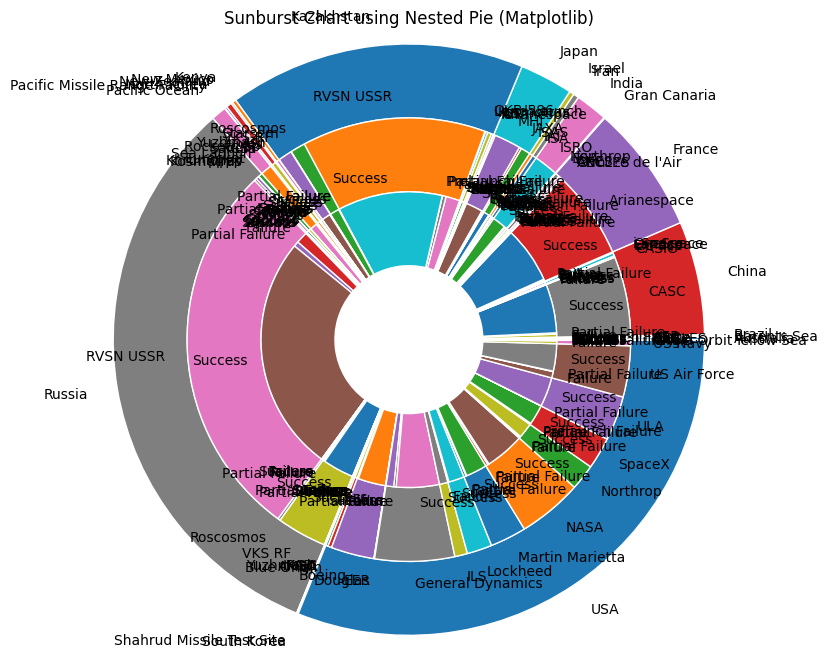

In [15]:
counts = data.groupby(['country', 'Organisation', 'Mission_Status']).size().reset_index(name='count')

countries = counts.groupby('country')['count'].sum()
orgs = counts.groupby(['country', 'Organisation'])['count'].sum()
missions = counts.set_index(['country', 'Organisation', 'Mission_Status'])['count']

sizes_outer = countries.values
labels_outer = countries.index

sizes_middle = orgs.values
labels_middle = orgs.index.get_level_values(1) 

sizes_inner = missions.values
labels_inner = missions.index.get_level_values(2) 


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes_outer, labels=labels_outer, radius=1.2, wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(sizes_middle, labels=labels_middle, radius=0.9, wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(sizes_inner, labels=labels_inner, radius=0.6, wedgeprops=dict(width=0.3, edgecolor='w'))


ax.set(aspect="equal")
plt.title("Sunburst Chart using Nested Pie (Matplotlib)")
plt.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [16]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

data.groupby('Organisation')['Price'].sum()

Organisation
AEB                     0.00
AMBA                    0.00
ASI                     0.00
Arianespace        16,345.00
Arm??e de l'Air         0.00
Blue Origin             0.00
Boeing              1,241.00
CASC                6,340.26
CASIC                   0.00
CECLES                  0.00
CNES                    0.00
Douglas                 0.00
EER                    20.00
ESA                    37.00
Eurockot              543.40
ExPace                 28.30
Exos                    0.00
General Dynamics        0.00
IAI                     0.00
ILS                 1,320.00
IRGC                    0.00
ISA                     0.00
ISAS                    0.00
ISRO                2,177.00
JAXA                  168.00
KARI                    0.00
KCST                    0.00
Khrunichev              0.00
Kosmotras             638.00
Land Launch             0.00
Landspace               0.00
Lockheed              280.00
MHI                 3,532.50
MITT                    0.00
M

In [17]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Analyse the Amount of Money Spent by Organisation per Launch

In [18]:
data.groupby('Organisation')['Price'].mean().dropna()

Organisation
Arianespace       170.26
Boeing            177.29
CASC               40.13
EER                20.00
ESA                37.00
Eurockot           41.80
ExPace             28.30
ILS               101.54
ISRO               32.49
JAXA               56.00
Kosmotras          29.00
Lockheed           35.00
MHI                95.47
Martin Marietta    80.16
NASA              450.00
Northrop           47.35
Rocket Lab          7.50
Roscosmos          51.63
Sandia             15.00
SpaceX             54.99
ULA               151.00
US Air Force       59.65
VKS RF             46.94
Virgin Orbit       12.00
Name: Price, dtype: float64

# Chart the Number of Launches per Year

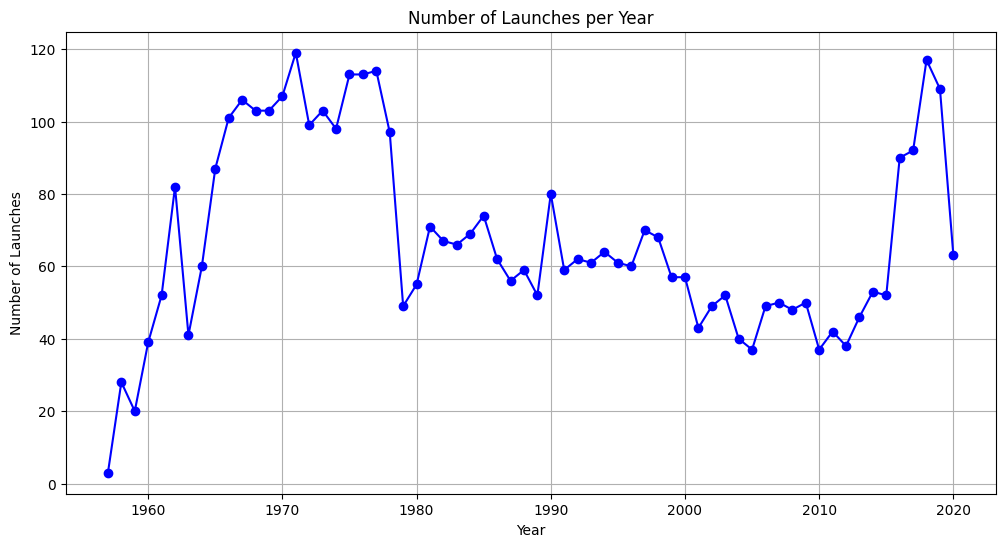

In [19]:
data ['year'] = data['Date'].str.split(',').str[1].str.split(' ').str[1].str.strip()
data.head()


launches_per_year = data.groupby('year').size()

launches_per_year.index = launches_per_year.index.astype(int)
launches_per_year = launches_per_year.sort_index()


plt.figure(figsize=(12, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Launches per Year")
plt.grid(True)


plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

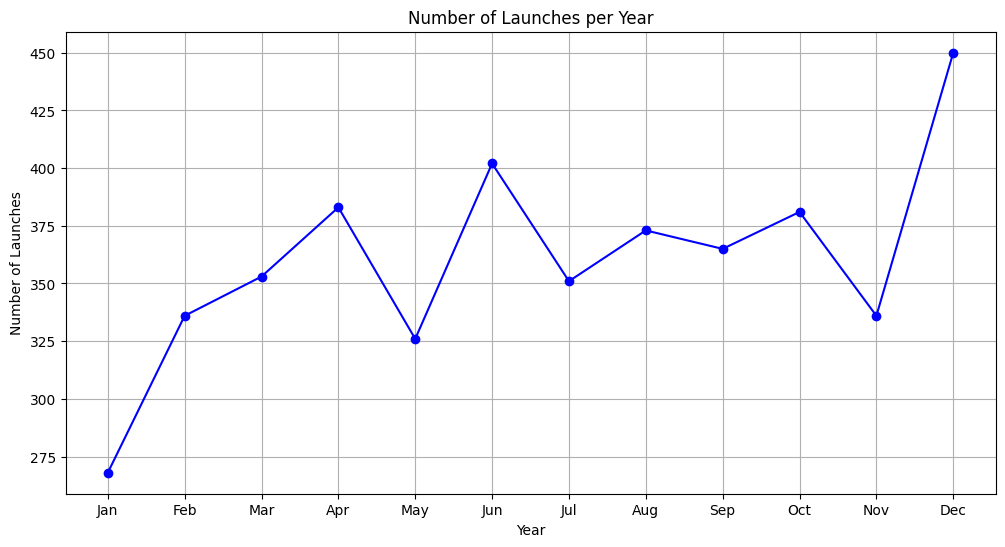

In [20]:
data['Month'] = data['Date'].str.split(' ').str[1].str.strip()
data.groupby('Month').size()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

launches_per_month = data.groupby('Month').size().reindex(month_order)

plt.figure(figsize=(12, 6))
plt.plot(launches_per_month.index, launches_per_month.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Launches per Year")
plt.grid(True)


plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

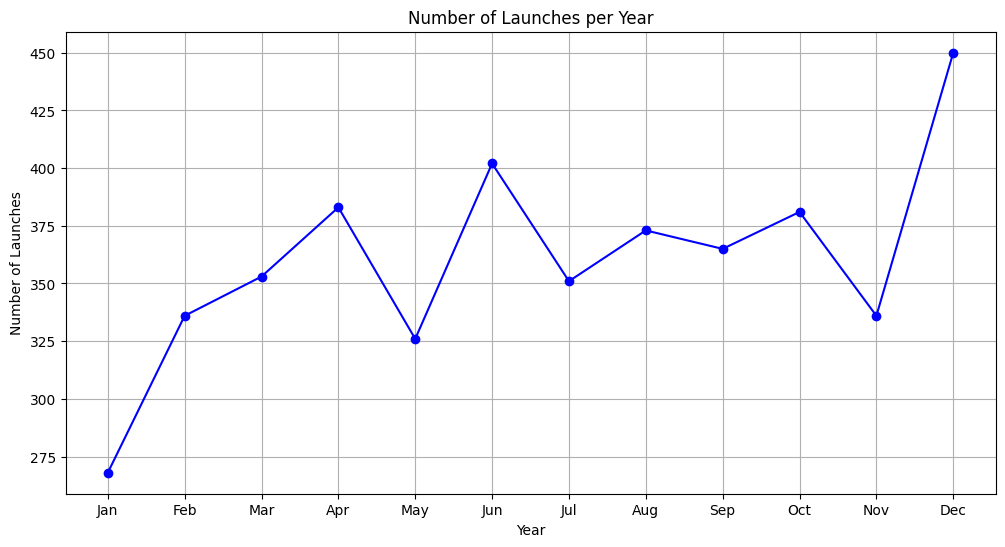

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(launches_per_month.index, launches_per_month.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Launches per Year")
plt.grid(True)


plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

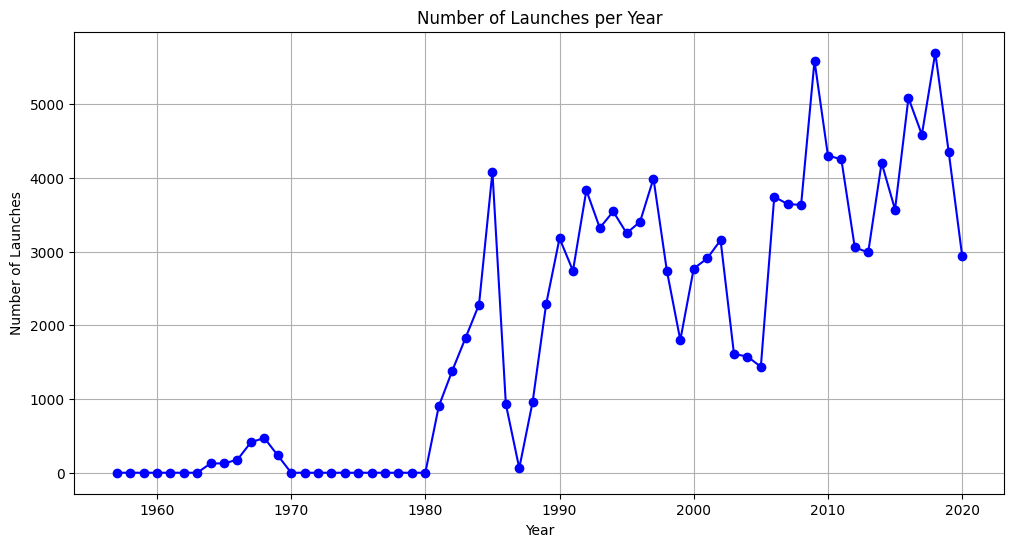

In [22]:
data['year'] = data['year'].astype(int)
priceOverTime = data.groupby('year')['Price'].sum()


plt.figure(figsize=(12, 6))
plt.plot(priceOverTime.index, priceOverTime.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Launches per Year")
plt.grid(True)


plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [23]:

chartData = data.groupby('Organisation').size().sort_values(ascending=False)[0:10]
data[data.country == 'USA']



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,Aug
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,Jul
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,2020,Jul
10,10,10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,USA,2020,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...
4317,4317,4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,1958,Mar
4318,4318,4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,1958,Mar
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958,Feb
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,Feb


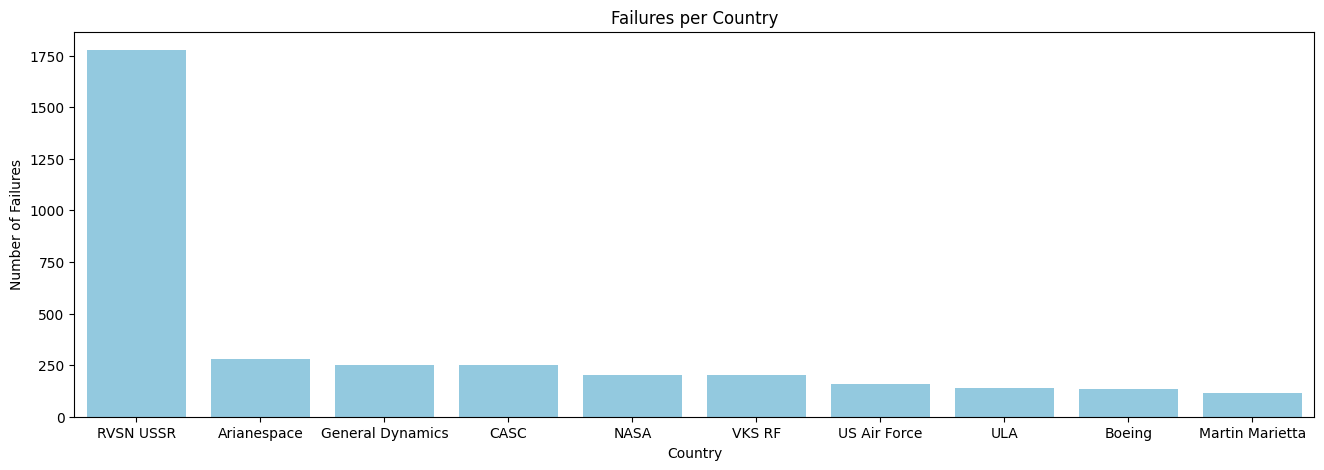

In [24]:
plt.figure(figsize=(16, 5)) 

sns.barplot(x=chartData.index, y=chartData.values, color='skyblue')

plt.xlabel('Country')
plt.ylabel('Number of Failures')
plt.title('Failures per Country')

plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [25]:
data[(data.Organisation == 'RVSN USSR') | (data.country == 'USA')]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,Aug
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,Jul
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,2020,Jul
10,10,10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,USA,2020,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958,Feb
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,Feb
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,Dec
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,1957,Nov


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

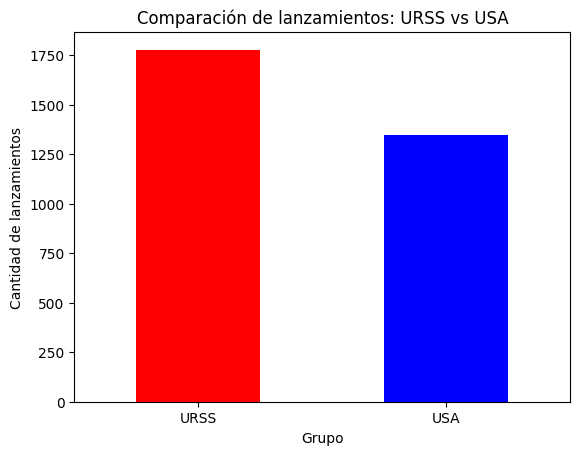

In [26]:
data['Group'] = None
data.loc[data['Organisation'] == 'RVSN USSR', 'Group'] = 'URSS'
data.loc[data['country'] == 'USA', 'Group'] = 'USA'

launch_counts = data['Group'].dropna().value_counts()

launch_counts.plot(kind='bar', color=['red', 'blue'])

plt.title('Comparación de lanzamientos: URSS vs USA')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de lanzamientos')
plt.xticks(rotation=0)
plt.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

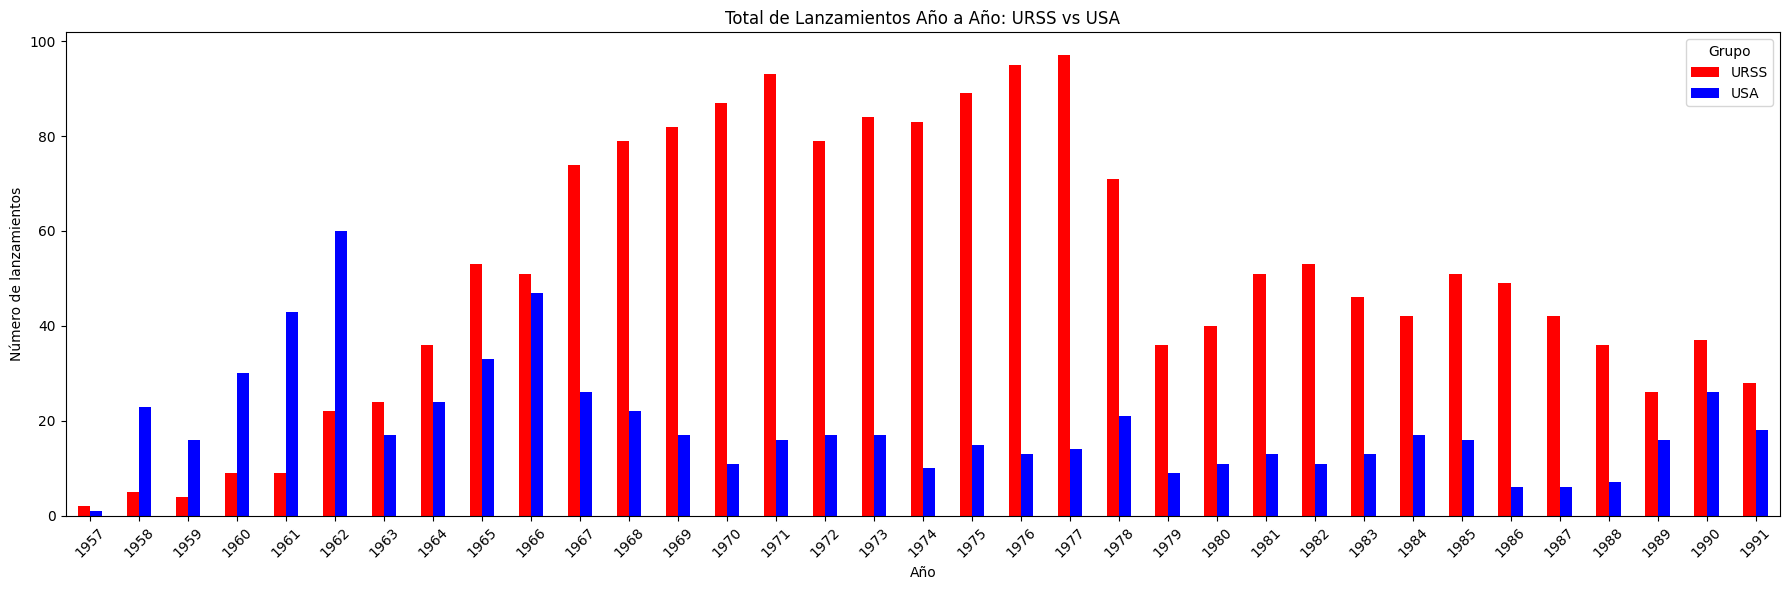

In [27]:
filtered_data = data[(data['Group'] == 'URSS') | (data['Group'] == 'USA')]
filtered_data = filtered_data[filtered_data.year < 1992]


launches_by_year = filtered_data.groupby(['year', 'Group']).size().unstack()

launches_by_year.plot(kind='bar', stacked=False, color=['red', 'blue'], figsize=(18, 6))

plt.title('Total de Lanzamientos Año a Año: URSS vs USA')
plt.xlabel('Año')
plt.ylabel('Número de lanzamientos')
plt.xticks(rotation=45)
plt.legend(title='Grupo', labels=['URSS', 'USA'])
plt.tight_layout()

plt.show()


## Chart the Total Number of Mission Failures Year on Year.

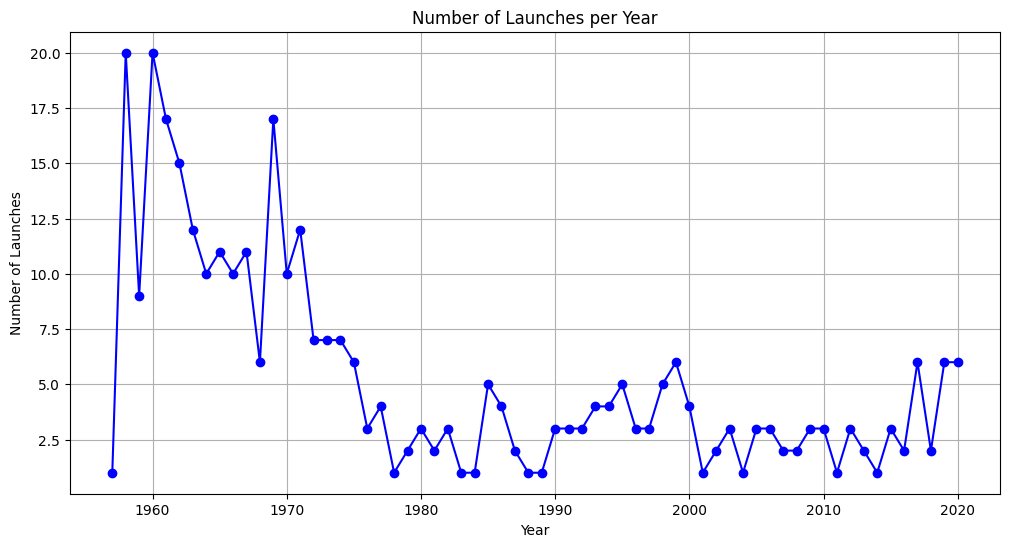

In [28]:
filtered_data = data[data.Mission_Status == 'Failure']
filtered_data = filtered_data.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Launches per Year")
plt.grid(True)


plt.show()

In [ ]:
data['Failure'] = data['Mission_Status'].str.contains('Failure', case=False, na=False)



## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

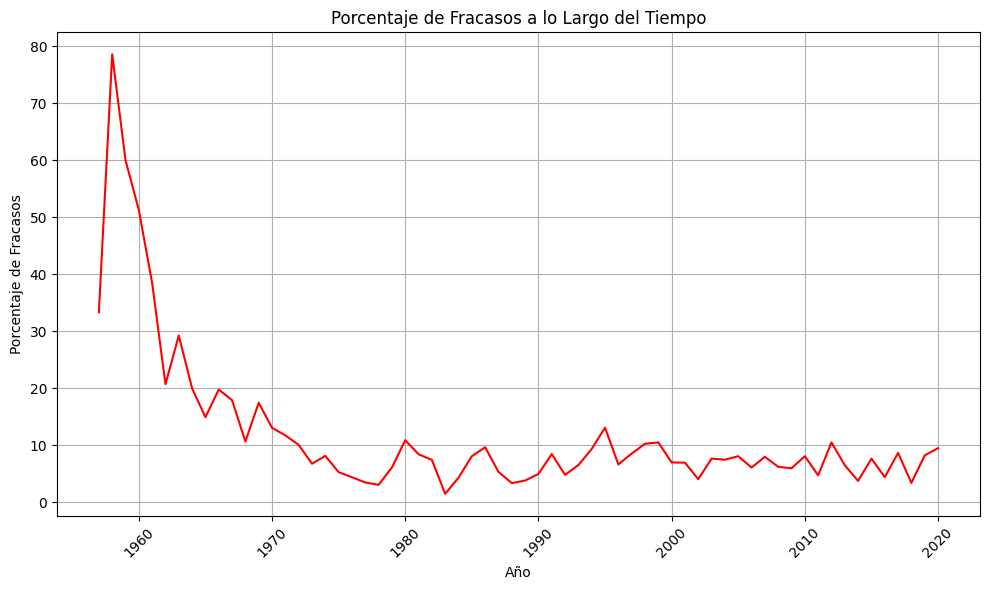

In [30]:
failure_percentage =data.groupby('year')['Failure'].mean() * 100
plt.figure(figsize=(10, 6))
failure_percentage.plot(kind='line', color='red')

plt.title('Porcentaje de Fracasos a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Fracasos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

year
1957    Kazakhstan
1958           USA
1959           USA
1960           USA
1961           USA
           ...    
2016        Russia
2017        Russia
2018        Russia
2019        Russia
2020        Russia
Length: 64, dtype: object


<Figure size 1000x600 with 0 Axes>

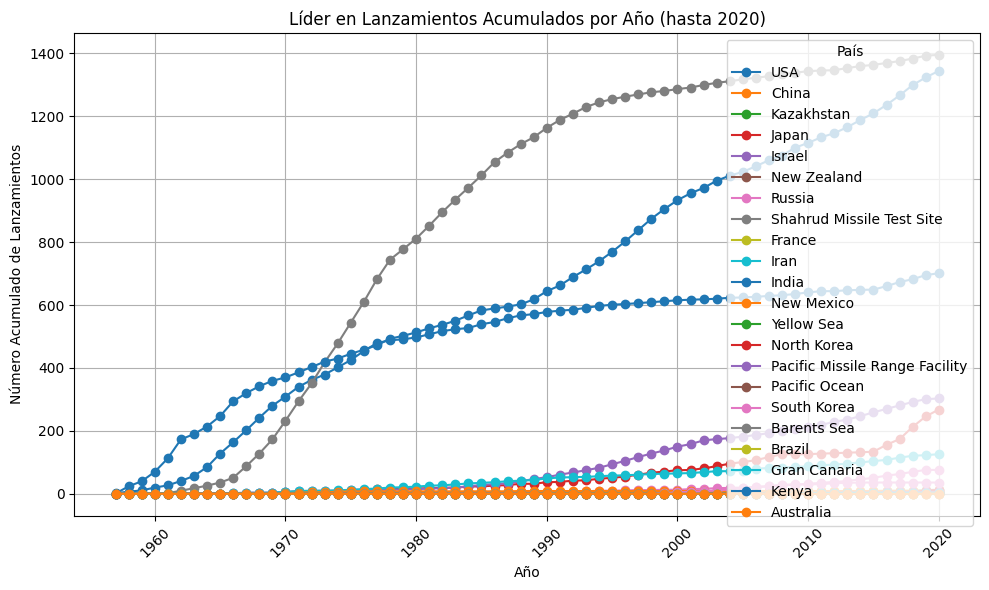

In [43]:

filtered_data = data

launches_by_year_and_country = filtered_data.groupby(['year', 'country']).size().unstack(fill_value=0)


cumulative_launches = launches_by_year_and_country.cumsum(axis=0)

# Determinar qué país tenía más lanzamientos cada año
leading_country = cumulative_launches.idxmax(axis=1)

# Mostrar el país líder para cada año
print(leading_country)

# Plotear el resultado
plt.figure(figsize=(10, 6))

# Graficamos las acumulaciones de lanzamientos
cumulative_launches.plot(kind='line', marker='o', figsize=(10, 6))

# Configuración del gráfico
plt.title('Líder en Lanzamientos Acumulados por Año (hasta 2020)')
plt.xlabel('Año')
plt.ylabel('Número Acumulado de Lanzamientos')
plt.xticks(rotation=45)
plt.legend(title='País', labels=data['country'].unique())
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [42]:
data['country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)